In [1]:
using CSV, DataFrames, Plots, StatsBase

In [2]:
data = DataFrame(CSV.File("E:/Data/Titanic/train.csv"))
showall(first(data, 6))

6×12 DataFrame
│ Row │ PassengerId │ Survived │ Pclass │
│     │ Int64  

┌ Warning: `showall(df::AbstractDataFrame, allcols::Bool = true)` is deprecated, use `show(df, allrows = true, allcols = allcols)` instead.
│   caller = showall(::DataFrame) at deprecated.jl:66
└ @ DataFrames .\deprecated.jl:66


     │ Int64    │ Int64  │
├─────┼─────────────┼──────────┼────────┤
│ 1   │ 1           │ 0        │ 3      │
│ 2   │ 2           │ 1        │ 1      │
│ 3   │ 3           │ 1        │ 3      │
│ 4   │ 4           │ 1        │ 1      │
│ 5   │ 5           │ 0        │ 3      │
│ 6   │ 6           │ 0        │ 3      │

│ Row │ Name                                                │ Sex    │
│     │ String                                              │ String │
├─────┼─────────────────────────────────────────────────────┼────────┤
│ 1   │ Braund, Mr. Owen Harris                             │ male   │
│ 2   │ Cumings, Mrs. John Bradley (Florence Briggs Thayer) │ female │
│ 3   │ Heikkinen, Miss. Laina                              │ female │
│ 4   │ Futrelle, Mrs. Jacques Heath (Lily May Peel)        │ female │
│ 5   │ Allen, Mr. William Henry                            │ male   │
│ 6   │ Moran, Mr. James                                    │ male   │

│ Row │ Age      │ SibSp │ Parch │ Tic

In [3]:
describe(data)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,PassengerId,446.0,1,446.0,891
2,Survived,0.383838,0,0.0,1
3,Pclass,2.30864,1,3.0,3
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon"
5,Sex,,female,,male
6,Age,29.6991,0.42,28.0,80.0
7,SibSp,0.523008,0,0.0,8
8,Parch,0.381594,0,0.0,6
9,Ticket,,110152,,WE/P 5735


In [4]:
column_name = names(data)
nmissing_values =  Array([])
percentage_missing = Array([])
for i in column_name
    nMissings = length(findall(x -> ismissing(x), data[!,i]))
    append!(nmissing_values, nMissings)
    append!(percentage_missing, nMissings/nrow(data))
end


missing_data =  DataFrame(columns_name=column_name, num_missing=nmissing_values, percentage=percentage_missing)

,columns_name,num_missing,percentage
,String,Any,Any
1,PassengerId,0,0.0
2,Survived,0,0.0
3,Pclass,0,0.0
4,Name,0,0.0
5,Sex,0,0.0
6,Age,177,0.198653
7,SibSp,0,0.0
8,Parch,0,0.0
9,Ticket,0,0.0


In [5]:
data = select!(data, Not([:Cabin, :Name, :PassengerId]))
showall(first(data, 5))

5×9 DataFrame
│ Row │ Survived │ Pclass │ Sex    │ Age      │ SibSp │ Parch │
│     │ Int64    │ Int64  │ String │ Float64? │ Int64 │ Int64 │
├─────┼──────────┼────────┼────────┼──────────┼───────┼───────┤
│ 1   │ 0        │ 3      │ male   │ 22.0     │ 1     │ 0     │
│ 2   │ 1        │ 1      │ female │ 38.0     │ 1     │ 0     │
│ 3   │ 1        │ 3      │ female │ 26.0     │ 0     │ 0     │
│ 4   │ 1        │ 1      │ female │ 35.0     │ 1     │ 0     │
│ 5   │ 0        │ 3      │ male   │ 35.0     │ 0     │ 0     │

│ Row │ Ticket           │ Fare    │ Embarked │
│     │ String           │ Float64 │ String?  │
├─────┼──────────────────┼─────────┼──────────┤
│ 1   │ A/5 21171        │ 7.25    │ S        │
│ 2   │ PC 17599         │ 71.2833 │ C        │
│ 3   │ STON/O2. 3101282 │ 7.925   │ S        │
│ 4   │ 113803           │ 53.1    │ S        │
│ 5   │ 373450           │ 8.05    │ S        │

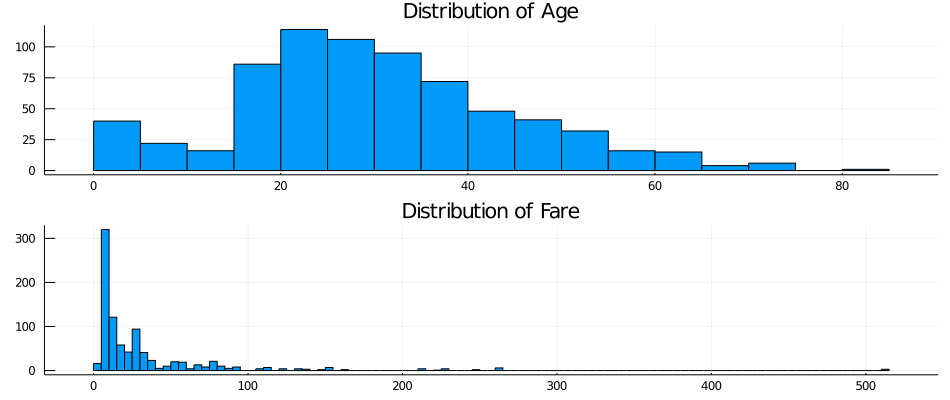

In [6]:
p1 = histogram(collect(skipmissing(data.Age)), title="Distribution of Age")
p2 = histogram(data.Fare, title="Distribution of Fare")
plot(p1,p2,layout=(2,1), legend=false)
plot!(size=(950,400))

In [7]:
sex_freq = combine(groupby(data, :Sex), :Sex=>length)
embarked_freq = combine(groupby(data, :Embarked), :Embarked=>length)
println(sex_freq)
println(embarked_freq)

2×2 DataFrame
│ Row │ Sex    │ Sex_length │
│     │ String │ Int64      │
├─────┼────────┼────────────┤
│ 1   │ male   │ 577        │
│ 2   │ female │ 314        │
4×2 DataFrame
│ Row │ Embarked │ Embarked_length │
│     │ String?  │ Int64           │
├─────┼──────────┼─────────────────┤
│ 1   │ S        │ 644             │
│ 2   │ C        │ 168             │
│ 3   │ Q        │ 77              │
│ 4   │ missing  │ 2               │


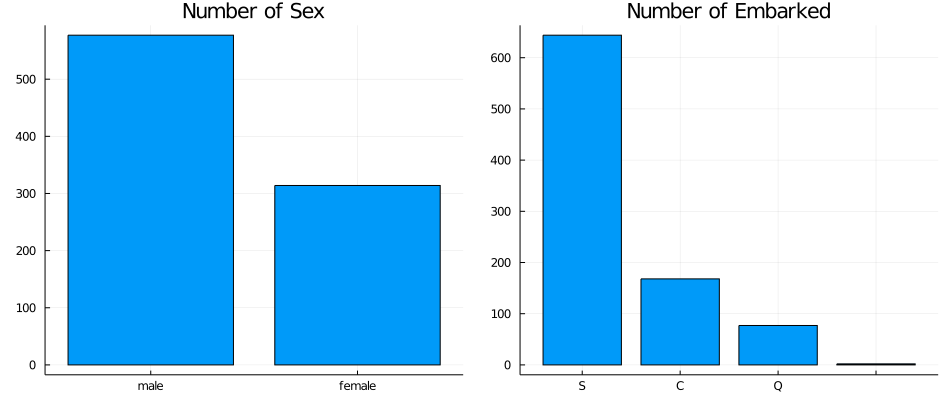

In [8]:
b1 = bar(sex_freq.Sex, sex_freq.Sex_length, legend=false, title="Number of Sex")
b2 = bar(embarked_freq.Embarked, embarked_freq.Embarked_length, legend=false, title="Number of Embarked")
plot(b1,b2,layout=(1,2))
plot!(size=(950,400))

In [9]:
data_clean = filter!(row->!ismissing(row.Embarked), data)
first(data_clean, 5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
,Int64,Int64,String,Float64?,Int64,Int64,String,Float64,String?
1,0,3,male,22.0,1,0,A/5 21171,7.25,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,S
4,1,1,female,35.0,1,0,113803,53.1,S
5,0,3,male,35.0,0,0,373450,8.05,S


In [10]:
embarked_freq = combine(groupby(data_clean, :Embarked), :Embarked=>length)

,Embarked,Embarked_length
,String?,Int64
1,S,644
2,C,168
3,Q,77


In [11]:
not_surv, surv = groupby(data_clean, :Survived)
first(not_surv, 5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
,Int64,Int64,String,Float64?,Int64,Int64,String,Float64,String?
1,0,3,male,22.0,1,0,A/5 21171,7.25,S
2,0,3,male,35.0,0,0,373450,8.05,S
3,0,3,male,missing,0,0,330877,8.4583,Q
4,0,1,male,54.0,0,0,17463,51.8625,S
5,0,3,male,2.0,3,1,349909,21.075,S


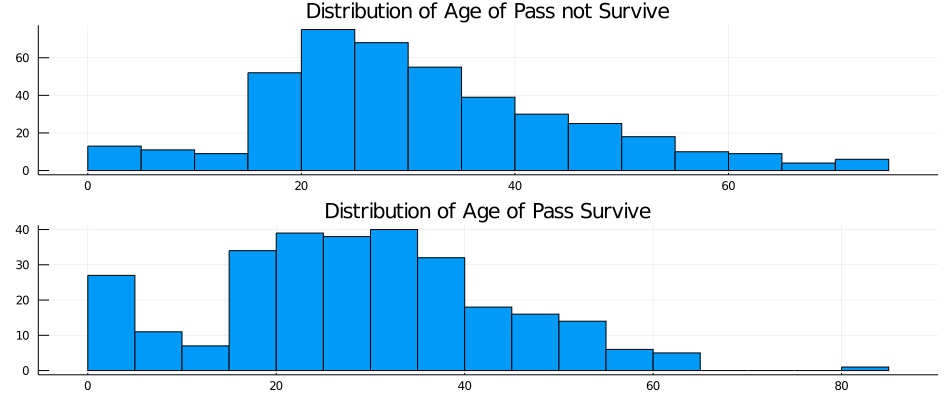

In [12]:
p1 = histogram(collect(skipmissing(not_surv.Age)), title="Distribution of Age of Pass not Survive")
p2 = histogram(collect(skipmissing(surv.Age)), title="Distribution of Age of Pass Survive")
plot(p1,p2,layout=(2,1), legend=false)
plot!(size=(950,400))

In [13]:
first(sort!(combine(groupby(data_clean,:Ticket), :Ticket=>length), [:Ticket_length], rev=true),5)

,Ticket,Ticket_length
,String,Int64
1,347082,7
2,1601,7
3,CA. 2343,7
4,3101295,6
5,CA 2144,6


In [14]:
data_clean = select!(data_clean, Not([:Ticket]))
first(data_clean, 5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,Int64,Int64,String,Float64?,Int64,Int64,Float64,String?
1,0,3,male,22.0,1,0,7.25,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.925,S
4,1,1,female,35.0,1,0,53.1,S
5,0,3,male,35.0,0,0,8.05,S


## Inputasi missing values

In [15]:
surv_age = combine(groupby(surv, :Age), :Age=>length)
surv_age_clean = filter!(row->!ismissing(row.Age), surv_age)
begin
    surv_age_clean[!,:proportion] = surv_age_clean[:Age_length]/sum(Array(surv_age_clean.Age_length))
    surv_age_clean
end
not_surv_age = combine(groupby(not_surv, :Age), :Age=>length)
not_surv_age_clean = filter!(row->!ismissing(row.Age), not_surv_age)
begin
    not_surv_age_clean[!,:proportion] = not_surv_age_clean[:Age_length]/sum(Array(not_surv_age_clean.Age_length))
    not_surv_age_clean
    end;

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:4
└ @ Core In[15]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:10
└ @ Core In[15]:10


In [16]:
age_surv = Array(surv_age_clean.Age)
weights_surv = Array(surv_age_clean.proportion)
age_fill = sample(age_surv, Weights(weights_surv), sum((ismissing.(data_clean[:Age])).&(isequal.(data_clean[:Survived],1))))
begin
    data_clean[(ismissing.(data_clean[:Age])).&(isequal.(data_clean[:Survived],1)),:Age] = age_fill
end

age_not_surv = Array(not_surv_age_clean.Age)
weights_not_surv = Array(not_surv_age_clean.proportion)
age_fill = sample(age_not_surv, Weights(weights_not_surv), sum((ismissing.(data_clean[:Age])).&(isequal.(data_clean[:Survived],0))))
begin
    data_clean[(ismissing.(data_clean[:Age])).&(isequal.(data_clean[:Survived],0)),:Age] = age_fill
    end;

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[16]:3
└ @ Core In[16]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[16]:3
└ @ Core In[16]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[16]:5
└ @ Core In[16]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[16]:5
└ @ Core In[16]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[16]:10
└ @ Core In[16]:10
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[16]:10
└ @ Core In[16]:10
┌ Warning: `getind

In [17]:
column_name = names(data_clean)
nmissing_values =  Array([])
percentage_missing = Array([])
for i in column_name
    nMissings = length(findall(x -> ismissing(x), data_clean[!,i]))
    append!(nmissing_values, nMissings)
    append!(percentage_missing, nMissings/nrow(data))
end


missing_data =  DataFrame(columns_name=column_name, num_missing=nmissing_values, percentage=percentage_missing)

,columns_name,num_missing,percentage
,String,Any,Any
1,Survived,0,0.0
2,Pclass,0,0.0
3,Sex,0,0.0
4,Age,0,0.0
5,SibSp,0,0.0
6,Parch,0,0.0
7,Fare,0,0.0
8,Embarked,0,0.0


In [18]:
not_surv_after, surv_after = groupby(data_clean, :Survived)
first(not_surv_after, 5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,Int64,Int64,String,Float64?,Int64,Int64,Float64,String?
1,0,3,male,22.0,1,0,7.25,S
2,0,3,male,35.0,0,0,8.05,S
3,0,3,male,37.0,0,0,8.4583,Q
4,0,1,male,54.0,0,0,51.8625,S
5,0,3,male,2.0,3,1,21.075,S


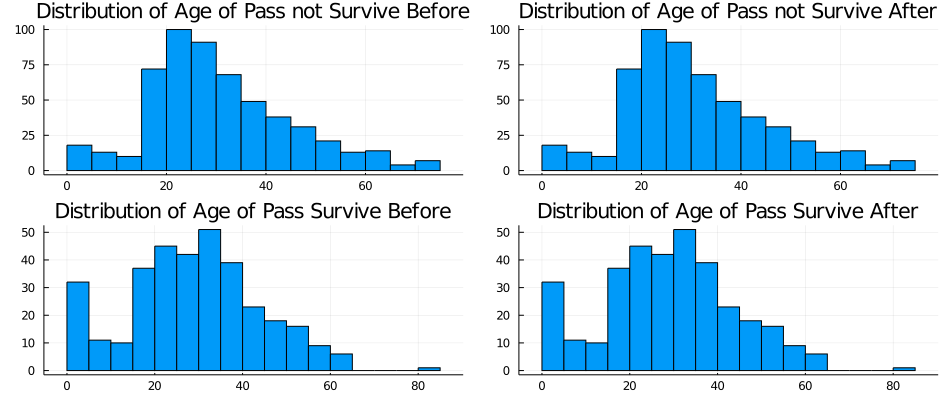

In [19]:
p1 = histogram(collect(skipmissing(not_surv.Age)), title="Distribution of Age of Pass not Survive Before")
p2 = histogram(collect(skipmissing(surv.Age)), title="Distribution of Age of Pass Survive Before")
p3 = histogram(not_surv_after.Age, title="Distribution of Age of Pass not Survive After")
p4 = histogram(surv_after.Age, title="Distribution of Age of Pass Survive After")
plot(p1,p3,p2,p4,layout=(2,2), legend=false)
plot!(size=(950,400))

# Modeling